In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#load the dataset
ml_df = pd.read_csv('ml.csv')
ml_df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


In [24]:
ml_df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [25]:
ml_df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [26]:
ml_df.info()
ml_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [27]:
ml_df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [28]:
ml_df.columns = ml_df.columns.str.strip()
ml_df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [29]:
ml_df.isnull().sum()/len(ml_df) * 100

Batch      0.0
User_ID    0.0
Score      0.0
dtype: float64

In [30]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [31]:
ml_df.shape

(149, 3)

### 1. UNIVARIATE ANALYSIS 

#### A) Numerical Univariate

Non-visual

In [32]:
ml_df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [33]:

print("Count")
print(ml_df['Batch'].value_counts())

print("\n","*"*4,"Percentage","*"*4)
print(ml_df['Batch'].value_counts(normalize=True) * 100)

Count
Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

 **** Percentage ****
Batch
AI_ELITE_7    35.570470
AI_ELITE_6    32.214765
AI_ELITE_4    32.214765
Name: proportion, dtype: float64


##### 🔸Visual

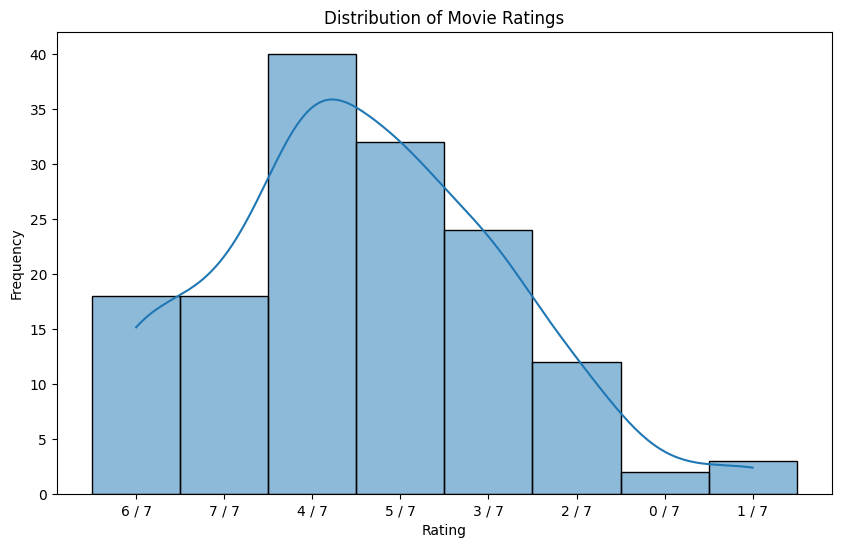

In [34]:
#histogram plot
plt.figure(figsize=(10,6))
sns.histplot(data=ml_df, x='Score', bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

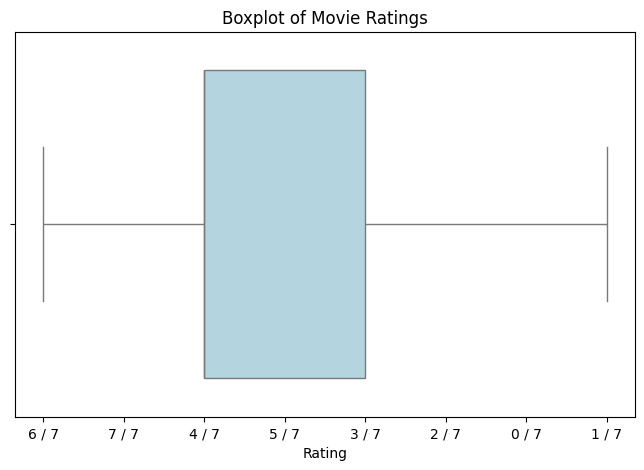

In [35]:
#boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Score', data=ml_df, color='lightblue')
plt.title('Boxplot of Movie Ratings')
plt.xlabel('Rating')
plt.show()

#### B) Categorical Univariate

##### 🔸Non-visual

In [36]:
# #frequency of test
print("Frequency of User_ID:")
print(ml_df['User_ID'].value_counts())

#percentage of test
print("\nPercentage of User_ID:")

user_id_percentages = ml_df['User_ID'].value_counts()/1000 * 100


print(user_id_percentages)

Frequency of User_ID:
User_ID
uid_149    1
uid_148    1
uid_147    1
uid_146    1
uid_145    1
          ..
uid_5      1
uid_4      1
uid_3      1
uid_2      1
uid_1      1
Name: count, Length: 149, dtype: int64

Percentage of User_ID:
User_ID
uid_149    0.1
uid_148    0.1
uid_147    0.1
uid_146    0.1
uid_145    0.1
          ... 
uid_5      0.1
uid_4      0.1
uid_3      0.1
uid_2      0.1
uid_1      0.1
Name: count, Length: 149, dtype: float64


##### 🔸Visual

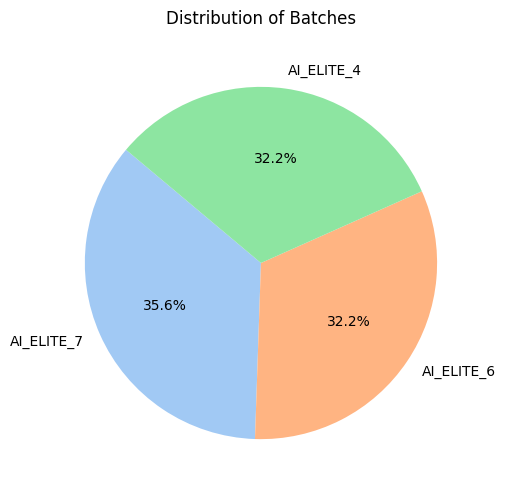

In [37]:
#pie chart
batch_counts = ml_df['Batch'].value_counts()
plt.figure(figsize=(5,6))
plt.pie(batch_counts, labels=batch_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Batches')
plt.axis('equal')
plt.show()

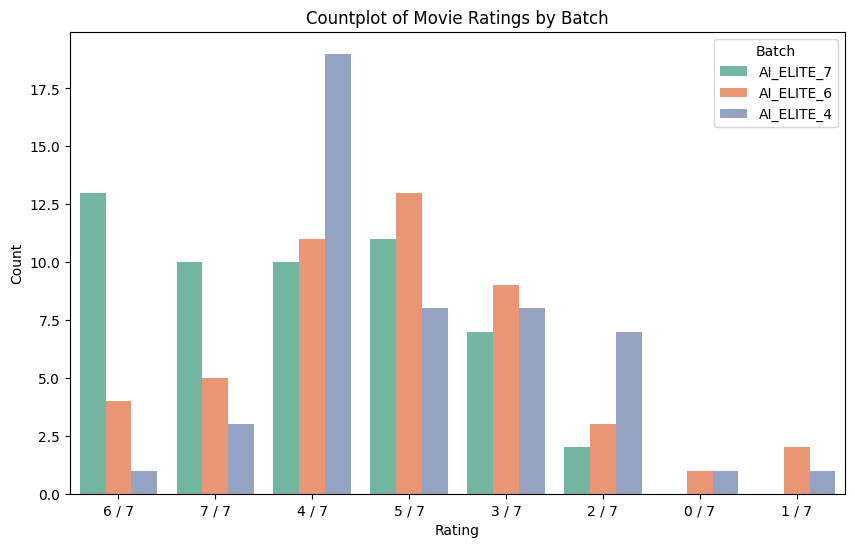

In [38]:
#contplot
plt.figure(figsize=(10,6))
sns.countplot(data=ml_df, x='Score', hue='Batch', palette='Set2')
plt.title('Countplot of Movie Ratings by Batch')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### 2. BIVARIATE ANALYSIS (Two columns together)

#### A) Numerical vs Numerical

##### 🔸Non-Visual

In [39]:
# Convert Score to a numeric value (e.g., "6 / 7" -> 6)
ml_df['Score_numeric'] = ml_df['Score'].str.split('/').str[0].astype(int)

# Calculate correlation between Batch_code and Score_numeric
correlation = ml_df['Score_numeric'].corr(ml_df['Score_numeric'])
print("Correlation between Batch and Score:", correlation)

Correlation between Batch and Score: 1.0


In [40]:
# Calculate covariance between Batch_code and Score_numeric
covariance = ml_df['Score_numeric'].cov(ml_df['Score_numeric'])
print("Covariance between Batch and Score:", covariance)

Covariance between Batch and Score: 2.5350988572465085


##### 🔸Visual

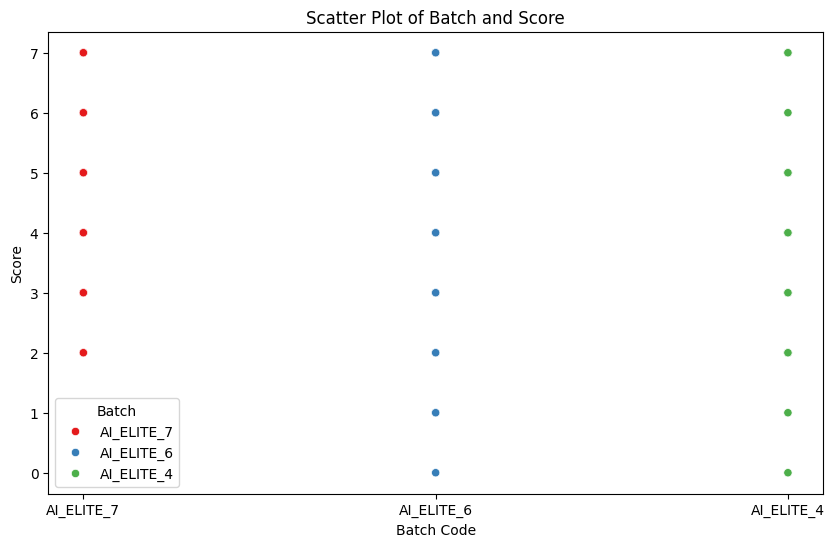

In [41]:
# Scatter plot of Batch_code vs Score_numeric
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ml_df, x='Batch', y='Score_numeric', hue='Batch', palette='Set1')
plt.title('Scatter Plot of Batch and Score')
plt.xlabel('Batch Code')
plt.ylabel('Score')
plt.legend(title='Batch')
plt.show()

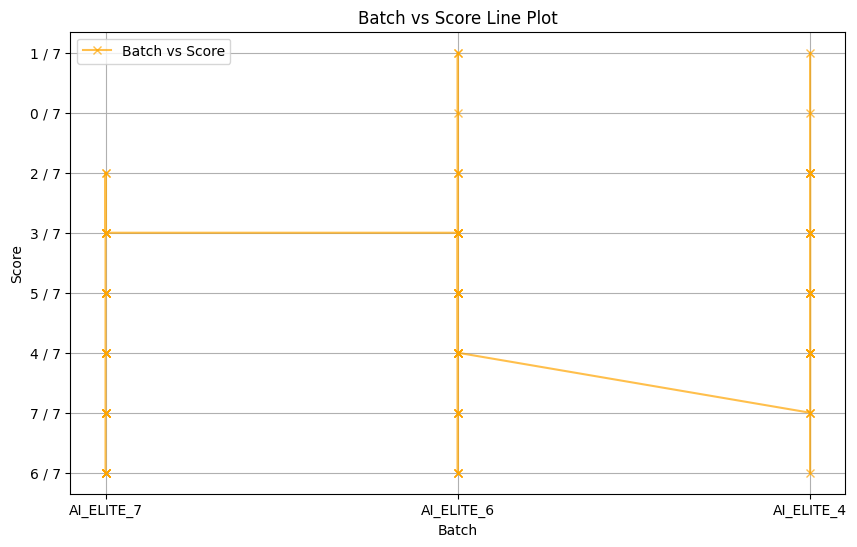

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(ml_df['Batch'], ml_df['Score'], marker='x', linestyle='-', color='orange', alpha=0.7, label='Batch vs Score')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.title('Batch vs Score Line Plot')
plt.legend()
plt.grid(True)
plt.show()

#### B) Numerical vs Categorical

##### 🔸Non-Visual

In [43]:
#groupby Batch VS Score
ml_df['Score_num'] = ml_df['Score'].str.extract(r'(\d+)').astype(int)

ml_df.groupby('Batch')['Score_num'].mean()


Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score_num, dtype: float64

##### 🔸Visual

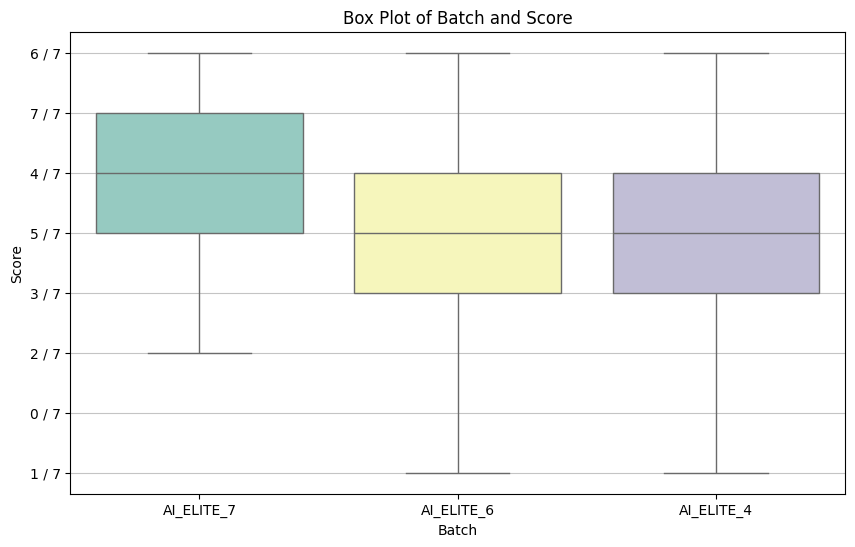

In [44]:
#boxplot of batch and score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Batch', y='Score', data=ml_df, hue='Batch', palette='Set3', fliersize=5, flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))
plt.title('Box Plot of Batch and Score')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### C) Categorical vs Categorical

##### 🔸Non-Visual

In [45]:
#crosstab of Batch_Score

Batch_Score = pd.crosstab(ml_df['Batch'],ml_df['Score'],normalize='index') * 100
print(Batch_Score)

Score          0 / 7     1 / 7      2 / 7      3 / 7      4 / 7      5 / 7  \
Batch                                                                        
AI_ELITE_4  2.083333  2.083333  14.583333  16.666667  39.583333  16.666667   
AI_ELITE_6  2.083333  4.166667   6.250000  18.750000  22.916667  27.083333   
AI_ELITE_7  0.000000  0.000000   3.773585  13.207547  18.867925  20.754717   

Score           6 / 7      7 / 7  
Batch                             
AI_ELITE_4   2.083333   6.250000  
AI_ELITE_6   8.333333  10.416667  
AI_ELITE_7  24.528302  18.867925  


##### 🔸Visual

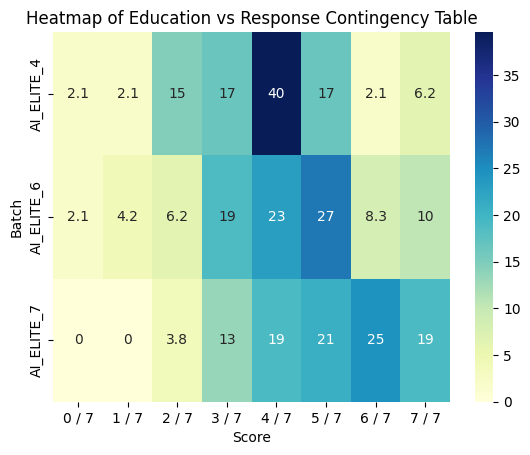

In [46]:
sns.heatmap(Batch_Score, annot=True,  cmap='YlGnBu', cbar=True)
plt.title('Heatmap of Education vs Response Contingency Table')
plt.show()